# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [66]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# File to Load (Remember to change these)
city_data_to_load = os.path.join("C:\\Users\\Nichelle\\Desktop\\Classwork\\PyBer_Analysis\\Resources\\city_data (1).csv")
ride_data_to_load = os.path.join("C:\\Users\\Nichelle\\Desktop\\Classwork\\PyBer_Analysis\\Resources\\ride_data (2).csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [67]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [68]:
#  1. Get the total rides for each city type
total_rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [69]:
# 2. Get the total number of drivers for each city type
total_drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city_type                                                                    

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [70]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [71]:
#  4. Get the average fare per ride for each city type. 
avgfares_per_ride_by_city_type = total_fares_by_city_type/ total_rides_by_city_type
avgfares_per_ride_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [72]:
# 5. Get the average fare per driver for each city type. 
avgfare_per_driver_by_city = total_fares_by_city_type / total_drivers_by_city_type
avgfare_per_driver_by_city


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [73]:
# 6. Build a DataFrame
summary_df = pd.DataFrame()

summary_df["Total Rides"] = total_rides_by_city_type
summary_df["Total Drivers"] = total_drivers_by_city_type
summary_df["Total Fares"] = total_fares_by_city_type
summary_df["Average Fare per Ride"] = avgfares_per_ride_by_city_type
summary_df["Average Fare per Driver"] = avgfare_per_driver_by_city

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [74]:
#  7. Cleaning up the DataFrame. Delete the index name
total_rides_by_city_type.index.name = None
total_rides_by_city_type



Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [75]:
total_fares_by_city_type.index.name = None
total_fares_by_city_type

Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [76]:
total_drivers_by_city_type.index.name = None
total_drivers_by_city_type

Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [77]:
#  8. Format the columns.
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:.2f}".format)

summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [78]:
# 1. Read the merged DataFrame
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [93]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_cities_fares_df=  pyber_data_df.groupby(['type', 'date']).sum()["fare"]
pyber_cities_fares_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [94]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

pyber_cities_fares_df = pyber_cities_fares.reset_index()
pyber_cities_fares_df


,index,type,date,fare
0,1970-01-01 00:00:00.000000000,Rural,2019-01-01 09:45:36,43.69
1,1970-01-01 00:00:00.000000001,Rural,2019-01-02 11:18:32,52.12
2,1970-01-01 00:00:00.000000002,Rural,2019-01-03 19:51:01,19.90
3,1970-01-01 00:00:00.000000003,Rural,2019-01-04 03:31:26,24.88
4,1970-01-01 00:00:00.000000004,Rural,2019-01-06 07:38:40,47.33
...,...,...,...,...
2370,1970-01-01 00:00:00.000002370,Urban,2019-05-08 04:20:00,21.99
2371,1970-01-01 00:00:00.000002371,Urban,2019-05-08 04:39:49,18.45
2372,1970-01-01 00:00:00.000002372,Urban,2019-05-08 07:29:01,18.55
2373,1970-01-01 00:00:00.000002373,Urban,2019-05-08 11:38:35,19.77


In [81]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_city_fares_pivot = pyber_data_df.pivot(index="date", columns="type")["fare"]
pyber_city_fares_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [82]:
date_window_fare_df = pyber_city_fares_pivot.loc['2019-01-01':'2019-04-28']

In [83]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_Jan_April_df = pyber_city_fares_pivot.loc['2019-01-01':'2019-04-28']
fares_Jan_April_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [97]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_cities_fares_df.index = pd.to_datetime(pyber_cities_fares_df.index)
pyber_cities_fares_df




,index,type,date,fare
1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,Rural,2019-01-01 09:45:36,43.69
1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,Rural,2019-01-02 11:18:32,52.12
1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000002,Rural,2019-01-03 19:51:01,19.90
1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000003,Rural,2019-01-04 03:31:26,24.88
1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,Rural,2019-01-06 07:38:40,47.33
...,...,...,...,...
1970-01-01 00:00:00.000002370,1970-01-01 00:00:00.000002370,Urban,2019-05-08 04:20:00,21.99
1970-01-01 00:00:00.000002371,1970-01-01 00:00:00.000002371,Urban,2019-05-08 04:39:49,18.45
1970-01-01 00:00:00.000002372,1970-01-01 00:00:00.000002372,Urban,2019-05-08 07:29:01,18.55
1970-01-01 00:00:00.000002373,1970-01-01 00:00:00.000002373,Urban,2019-05-08 11:38:35,19.77


In [96]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_cities_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000002374
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   2375 non-null   datetime64[ns]
 1   type    2375 non-null   object        
 2   date    2375 non-null   object        
 3   fare    2375 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 92.8+ KB


In [86]:
#fares_Jan_April_df= pd.DataFrame

In [99]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

pyber_cities_fares_resample_df = pyber_cities_fares_df.resample('W').sum()

In [ ]:
#weekly_fares_df= pd.to_datetime(pyber_data_df.index)
#weekly_fares_df = fares_Jan_April_df.resample("W").sum()
#weekly_fares_df


In [106]:
pyber_cities_fares_df


,index,type,date,fare
1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,Rural,2019-01-01 09:45:36,43.69
1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000001,Rural,2019-01-02 11:18:32,52.12
1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.000000002,Rural,2019-01-03 19:51:01,19.90
1970-01-01 00:00:00.000000003,1970-01-01 00:00:00.000000003,Rural,2019-01-04 03:31:26,24.88
1970-01-01 00:00:00.000000004,1970-01-01 00:00:00.000000004,Rural,2019-01-06 07:38:40,47.33
...,...,...,...,...
1970-01-01 00:00:00.000002370,1970-01-01 00:00:00.000002370,Urban,2019-05-08 04:20:00,21.99
1970-01-01 00:00:00.000002371,1970-01-01 00:00:00.000002371,Urban,2019-05-08 04:39:49,18.45
1970-01-01 00:00:00.000002372,1970-01-01 00:00:00.000002372,Urban,2019-05-08 07:29:01,18.55
1970-01-01 00:00:00.000002373,1970-01-01 00:00:00.000002373,Urban,2019-05-08 11:38:35,19.77


KeyError: 'urban'

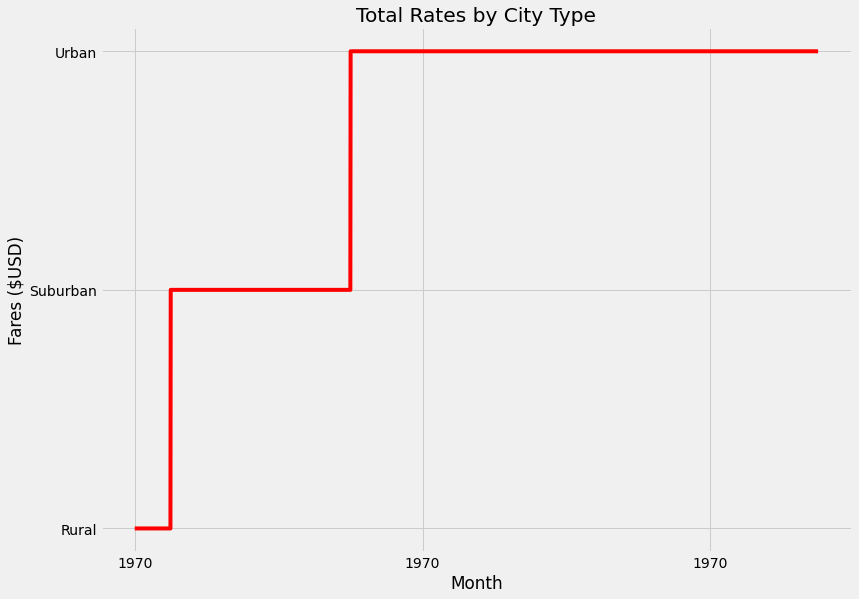

In [109]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
#plt.style.use('fivethirtyeight')
#weekly_fares_df.plot(figsize=(14, 8))
#plt.gcf().subplots_adjust(bottom=0.15
# Import the style from Matplotlib.
#from matplotlib import style
# Use the graph style fivethirtyeight.
#style.use('fivethirtyeight')
                          
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_title('Total Rates by City Type')
ax.set_xlabel('Month')
ax.set_ylabel('Fares ($USD)')
ax.plot(pyber_cities_fares_df['rural'], label='Rural', color='b')
ax.plot(pyber_cities_fares_df['suburban'],label='Suburban', color='r')
ax.plot(pyber_cities_fares_df['urban'], label='Urban', color='y')
ax.legend(title='City Type', loc='center')
date_format = '%b'
ax.xaxis.set_major_formatter(mdates.DateFormatter(date_format))
ax.xaxis.set_major_locator(mdates.MonthLocator())
